# Mini Project 1, team Kool Kids

# 1. Dataset Preparation & Analysis

### 1.1 Load Dataset

In [1]:
import gzip
import json
import pandas as pd

labels = 'Post', 'Emotion', 'Sentiment'
file = gzip.open('goemotions.json.gz', 'rb')
entries = json.load(file)
dataset = pd.DataFrame(entries, columns=labels)

### 1.3 Extract posts and labels in a plot

##### data extraction

In [2]:
posts = dataset[labels[0]]
emotions = dataset[labels[1]]
sentiments = dataset[labels[2]]
emotions_distribution = dataset.pivot_table(columns=labels[1], aggfunc='size')
sentiments_distribution = dataset.pivot_table(columns=labels[2], aggfunc='size')


##### plotting the distributions

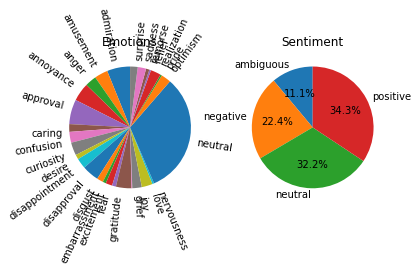

In [3]:
import matplotlib.pyplot as plt

fig, (emo, sent) = plt.subplots(1, 2)

# Emotions Pie Chart
emo.set_title("Emotions")
emo.pie(emotions_distribution.values, labels=emotions_distribution.keys(),
            shadow=False, startangle=90, rotatelabels=True)

# Sentiment Pie Chart
sent.set_title("Sentiment")
sent.pie(
    sentiments_distribution.values, labels=sentiments_distribution.keys(), 
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

# 2. Words as Features

### 2.1 Displaying dataset tokens

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

post_vectorizer = CountVectorizer()
X = post_vectorizer.fit_transform(dataset[labels[0]])
print('There are', X.shape[1], 'unique tokens')

emotions_label_encoder = LabelEncoder()
Y = emotions_label_encoder.fit_transform(emotions)

sentiments_label_encoder = LabelEncoder()
Z = sentiments_label_encoder.fit_transform(sentiments)

There are 30449 unique tokens


### 2.2 Splitting the dataset

In [5]:
from sklearn.model_selection.tests import test_split

post_train, post_test, emotion_train, emotion_test, sentiment_train, sentiment_test = test_split.train_test_split(
    X,
    Y,
    Z,
    test_size=0.20)

### 2.3 Classifier Training / Testing

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#### 2.3.1 Base-MNB

In [7]:
base_mnb_emotion = MultinomialNB()
base_mnb_emotion.fit(post_train, emotion_train)

base_mnb_sentiment = MultinomialNB()
base_mnb_sentiment.fit(post_train, sentiment_train)

MultinomialNB()

#### 2.3.2 Base-DT

In [8]:
base_dt_emotion = DecisionTreeClassifier()
base_dt_emotion.fit(post_train, emotion_train)

base_dt_sentiment = DecisionTreeClassifier()
base_dt_sentiment.fit(post_train, sentiment_train)

DecisionTreeClassifier()

#### 2.3.3 Base-MLP

In [ ]:
base_mlp_emotion = MLPClassifier(max_iter=5)
print(base_mlp_emotion.fit(post_train, emotion_train))


base_mlp_sentiment = MLPClassifier(max_iter=5)
print(base_mlp_sentiment.fit(post_train, sentiment_train))


#### 2.3.4 Top-MNB

In [10]:
param_grid = {'alpha': [0, 0.25, 0.5, 0.75]}
top_mnb_emotion = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_emotion.fit(post_train, emotion_train)

top_mnb_sentiment = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_sentiment.fit(post_train, sentiment_train)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting a

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0, 0.25, 0.5, 0.75]})

#### 2.3.5 Top-DT

In [11]:
param_grid = {
        'criterion': ['entropy'],
        'max_depth': [2, 8],
        'min_samples_split': [2, 4, 6]
    }
top_dt_emotion = GridSearchCV(DecisionTreeClassifier(), param_grid)
top_dt_emotion.fit(post_train, emotion_train)

top_dt_sentiment = GridSearchCV(DecisionTreeClassifier(), param_grid)
top_dt_sentiment.fit(post_train, sentiment_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 8],
                         'min_samples_split': [2, 4, 6]})

#### 2.3.6 Top-MLP

In [12]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd']
}

top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=4), param_grid)
top_mlp_emotion.fit(post_train, emotion_train)


top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=4), param_grid)
top_mlp_sentiment.fit(post_train, sentiment_train)

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

GridSearchCV(estimator=MLPClassifier(max_iter=4),
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

### 2.4 Performance

#### Classification report

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Base MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base DT')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_dt_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_dt_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_dt_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_dt_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top DT')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_dt_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_dt_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_dt_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_dt_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

Base MNB
Emotion
Confusion Matrix 

[[ 965   22    7   10   46    4    3    8    0    0    4    0    1    2
     0   41    0   12   45    0  965    7    0    1    0    0    2   11]
 [  37  390    4   14   19    0    0    4    0    0    9    0    0    0
     0    9    0   11    8    0  711    3    0    0    0    1    1    6]
 [  13   10  127   71   13    3    0    3    0    2   16    9    0    0
     0    5    0    0    2    0  739    1    0    1    0    0    3    1]
 [  29   22   51  123   35    7    6    6    0    7   34   12    1    1
     0   20    0    3    4    0 1274    3    0    5    1    0    7    4]
 [ 108   13    4   17  205    6    9    3    2    3   30    1    0    4
     0   12    0    5   10    0 1772   17    0    5    0    0    6    2]
 [  19    4    1    5   16   41    2    1    0    1    3    0    0    1
     0   19    0    2    3    0  564   17    0    1    0    0    2    0]
 [   8    8    4   13   19    0   46   35    1    3   14    1    0    0
     1    2    0    0 

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.47      0.45      0.46      2156
     amusement       0.55      0.32      0.40      1227
         anger       0.37      0.12      0.19      1019
     annoyance       0.21      0.07      0.11      1655
      approval       0.24      0.09      0.13      2234
        caring       0.28      0.06      0.10       702
     confusion       0.30      0.05      0.08       972
     curiosity       0.43      0.11      0.18      1119
        desire       0.47      0.04      0.08       435
disappointment       0.24      0.04      0.06       928
   disapproval       0.21      0.07      0.10      1482
       disgust       0.45      0.08      0.14       599
 embarrassment       0.36      0.02      0.03       303
    excitement       0.32      0.04      0.07       575
          fear       0.36      0.02      0.03       324
     gratitude       0.75      0.68      0.71      1490
         grief       0.00      0.00      0.00  

[[1132   40   12   12   68   16   10   15    8    7   10    7    4   32
     6   56    0   51   91    2  484   25    9   15    1    1    6   36]
 [  33  732    9   22   18    5    7    6    2    5   11    8    2   11
     0    7    0   31   12    0  259   10    1    9    1    3    6   17]
 [   8   14  308   85   19    9    9    5    1   18   31   30    2    6
    16    6    2    4    4    0  402    4    2   11    0    2    9   12]
 [  29   45  124  159   45   20   33   32    3   43   88   61   11    6
    17   18    1    9   12    1  793   20    0   21    4    9   24   27]
 [ 129   41   23   43  288   41   37   20   15   27   61   15    6   24
     9   17    0   24   37    2 1234   47    3   31    6   13   16   25]
 [  22   11    7    8   23  129    7    3    6    8   14    1    2    1
     5   19    0   15    9    8  325   39    1    2    3   12   17    5]
 [  10   23   23   14   25    4  143   91    4    9   27    8    7    6
     7    3    0    3    6    0  518    5    0   16    0  

              precision    recall  f1-score   support

   ambiguous       0.40      0.27      0.33      3741
    negative       0.54      0.54      0.54      7620
     neutral       0.50      0.48      0.49     11048
    positive       0.63      0.71      0.67     11955

    accuracy                           0.55     34364
   macro avg       0.52      0.50      0.50     34364
weighted avg       0.54      0.55      0.54     34364

Top DT
Emotion
Confusion Matrix 

[[  463    10     0     0     0     0     1     1     0     0     0     0
      0     0     0    17     0     0    82     0  1567    15     0     0
      0     0     0     0]
 [   33   420     0     0     0     1     1     0     0     0     0     0
      0     0     0     5     0     0     9     0   752     2     0     1
      0     3     0     0]
 [   18     7     1     0     0     0     0     0     0     0     0     0
      0     0     0     4     0     0     7     0   977     2     0     0
      0     3     0     0]
 [   3

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1174   42    9    7   79    8    8   15    6    7    7    3    2   21
     6   47    0   66   98    0  478   27    1   18    0    0    3   24]
 [  38  727   10   17   26    0    6    7    0    2   15    5    2    4
     0    5    0   48   15    0  266    4    0    7    0    3    6   14]
 [   8   15  305  109   26    7    4    5    0   10   32   25    2    1
    10    4    0    7    6    1  413    3    0    6    0    2    7   11]
 [  26   51  127  188   62   10   23   26    2   27   78   44   10    6
    18   13    0   17   12    1  836   15    0   23    0    7   19   14]
 [ 149   39   25   44  346   29   27   19   10   22   69    5    1   21
     8   12    0   29   32    2 1252   29    0   30    0    4   14   16]
 [  26    9   10   12   32  123    5    1    5    4   12    1    1    1
     6   15    0   14    8    3  349   38    0    2    2    7   14    2]
 [  10   26   21   14   35    1  127   80    2    4   32    7    4    2
     4    3    0    4    8    0  553    7    0   18    0  

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 876  534 1732  599]
 [ 294 4007 2417  902]
 [ 578 1649 6736 2085]
 [ 287  876 2706 8086]]

 Classification Report 

              precision    recall  f1-score   support

   ambiguous       0.43      0.23      0.30      3741
    negative       0.57      0.53      0.55      7620
     neutral       0.50      0.61      0.55     11048
    positive       0.69      0.68      0.68     11955

    accuracy                           0.57     34364
   macro avg       0.55      0.51      0.52     34364
weighted avg       0.57      0.57      0.57     34364



### 2.5 Exploration (Removing Stop Words)

In [14]:
post_vectorizer = CountVectorizer(stop_words='english')
X = post_vectorizer.fit_transform(dataset[labels[0]])
print('There are', X.shape[1], 'unique tokens')

There are 30148 unique tokens


#### 2.5.1 Base-MNB

In [15]:
base_mnb_emotion = MultinomialNB()
base_mnb_emotion.fit(post_train, emotion_train)

base_mnb_sentiment = MultinomialNB()
base_mnb_sentiment.fit(post_train, sentiment_train)

MultinomialNB()

#### 2.5.2 Base-DT

In [16]:
base_dt_emotion = DecisionTreeClassifier()
base_dt_emotion.fit(post_train, emotion_train)

base_dt_sentiment = DecisionTreeClassifier()
base_dt_sentiment.fit(post_train, sentiment_train)

DecisionTreeClassifier()

#### 2.5.3 Base-MLP

In [17]:
base_mlp_emotion = MLPClassifier(max_iter=1)
print(base_mlp_emotion.fit(post_train, emotion_train))


base_mlp_sentiment = MLPClassifier(max_iter=1)
print(base_mlp_sentiment.fit(post_train, sentiment_train))


C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1)
MLPClassifier(max_iter=1)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 2.5.4 Top-MNB

In [18]:
param_grid = {'alpha': [0, 0.25, 0.5, 0.75]}
top_mnb_emotion = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_emotion.fit(post_train, emotion_train)

top_mnb_sentiment = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_sentiment.fit(post_train, sentiment_train)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting a

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0, 0.25, 0.5, 0.75]})

#### 2.5.5 Top-DT

In [19]:
param_grid = {
        'criterion': ['entropy'],
        'max_depth': [2, 8],
        'min_samples_split': [2, 4, 6]
    }
top_dt_emotion = GridSearchCV(DecisionTreeClassifier(), param_grid)
top_dt_emotion.fit(post_train, emotion_train)

top_dt_sentiment = GridSearchCV(DecisionTreeClassifier(), param_grid)
top_dt_sentiment.fit(post_train, sentiment_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 8],
                         'min_samples_split': [2, 4, 6]})

#### 2.5.6 Top-MLP

In [20]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd']
}

top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_emotion.fit(post_train, emotion_train)


top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_sentiment.fit(post_train, sentiment_train)

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

GridSearchCV(estimator=MLPClassifier(max_iter=1),
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

#### Classification report

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print('Base MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base DT')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_dt_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_dt_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_dt_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_dt_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top DT')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_dt_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_dt_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_dt_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_dt_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Base MNB
Emotion
Confusion Matrix 

[[ 965   22    7   10   46    4    3    8    0    0    4    0    1    2
     0   41    0   12   45    0  965    7    0    1    0    0    2   11]
 [  37  390    4   14   19    0    0    4    0    0    9    0    0    0
     0    9    0   11    8    0  711    3    0    0    0    1    1    6]
 [  13   10  127   71   13    3    0    3    0    2   16    9    0    0
     0    5    0    0    2    0  739    1    0    1    0    0    3    1]
 [  29   22   51  123   35    7    6    6    0    7   34   12    1    1
     0   20    0    3    4    0 1274    3    0    5    1    0    7    4]
 [ 108   13    4   17  205    6    9    3    2    3   30    1    0    4
     0   12    0    5   10    0 1772   17    0    5    0    0    6    2]
 [  19    4    1    5   16   41    2    1    0    1    3    0    0    1
     0   19    0    2    3    0  564   17    0    1    0    0    2    0]
 [   8    8    4   13   19    0   46   35    1    3   14    1    0    0
     1    2    0    0 

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.47      0.45      0.46      2156
     amusement       0.55      0.32      0.40      1227
         anger       0.37      0.12      0.19      1019
     annoyance       0.21      0.07      0.11      1655
      approval       0.24      0.09      0.13      2234
        caring       0.28      0.06      0.10       702
     confusion       0.30      0.05      0.08       972
     curiosity       0.43      0.11      0.18      1119
        desire       0.47      0.04      0.08       435
disappointment       0.24      0.04      0.06       928
   disapproval       0.21      0.07      0.10      1482
       disgust       0.45      0.08      0.14       599
 embarrassment       0.36      0.02      0.03       303
    excitement       0.32      0.04      0.07       575
          fear       0.36      0.02      0.03       324
     gratitude       0.75      0.68      0.71      1490
         grief       0.00      0.00      0.00  

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.53      0.50      0.52      2156
     amusement       0.53      0.65      0.58      1227
         anger       0.38      0.23      0.29      1019
     annoyance       0.24      0.05      0.08      1655
      approval       0.37      0.08      0.13      2234
        caring       0.32      0.08      0.13       702
     confusion       0.38      0.08      0.13       972
     curiosity       0.35      0.15      0.22      1119
        desire       0.43      0.23      0.30       435
disappointment       0.40      0.02      0.05       928
   disapproval       0.20      0.05      0.08      1482
       disgust       0.43      0.16      0.23       599
 embarrassment       0.50      0.02      0.04       303
    excitement       0.47      0.07      0.12       575
          fear       0.50      0.24      0.33       324
     gratitude       0.83      0.77      0.80      1490
         grief       0.00      0.00      0.00  

              precision    recall  f1-score   support

   ambiguous       0.40      0.27      0.33      3741
    negative       0.54      0.54      0.54      7620
     neutral       0.50      0.48      0.49     11048
    positive       0.63      0.71      0.67     11955

    accuracy                           0.55     34364
   macro avg       0.52      0.50      0.50     34364
weighted avg       0.54      0.55      0.54     34364

Top DT
Emotion
Confusion Matrix 

[[  463    10     0     0     0     0     1     1     0     0     0     0
      0     0     0    17     0     0    82     0  1567    15     0     0
      0     0     0     0]
 [   33   420     0     0     0     1     1     0     0     0     0     0
      0     0     0     5     0     0     9     0   752     2     0     1
      0     3     0     0]
 [   18     7     1     0     0     0     0     0     0     0     0     0
      0     0     0     4     0     0     7     0   977     2     0     0
      0     3     0     0]
 [   3

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1153   33    6    7   17    4    1   14    4    0    4    2    0    3
     4   38    0   32   91    0  693   18    0    0    0    1    2   29]
 [  38  784   13    3    5    0    1    7    0    0    1    0    0    0
     2    5    0   21    8    0  308    3    0    0    0    2    8   18]
 [  13   15  256   46    4    1    2    4    0    1   15    8    0    0
     6    5    0    2    5    0  621    2    0    0    0    3    7    3]
 [  34   54  110   77    7    5    7   19    2    2   30   19    0    0
    10   25    0    7   10    0 1191    5    0    0    0   12   22    7]
 [ 146   42   12   16  106    6    6   10    2    0   18    3    0    0
     3   13    0   14   30    0 1757   27    0    0    0    6    9    8]
 [  24    8   10   10    3   45    1    6    4    0   10    0    0    0
     1   15    0   11    7    0  491   37    0    0    0   10    8    1]
 [  12   21   13   11    9    1   51   44    0    0   18    4    0    0
     4    4    0    3    8    0  754    4    0    0    0  

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.50      0.53      0.52      2156
     amusement       0.53      0.64      0.58      1227
         anger       0.35      0.25      0.29      1019
     annoyance       0.18      0.05      0.07      1655
      approval       0.37      0.05      0.08      2234
        caring       0.30      0.06      0.11       702
     confusion       0.44      0.05      0.09       972
     curiosity       0.33      0.13      0.19      1119
        desire       0.49      0.20      0.29       435
disappointment       0.43      0.01      0.01       928
   disapproval       0.18      0.04      0.07      1482
       disgust       0.45      0.13      0.20       599
 embarrassment       0.00      0.00      0.00       303
    excitement       0.65      0.06      0.11       575
          fear       0.43      0.26      0.33       324
     gratitude       0.80      0.78      0.79      1490
         grief       0.00      0.00      0.00  

## 3 Embedding as Features

### 3.1 Word2Vec import

In [22]:
from gensim.downloader import load


model = load('word2vec-google-news-300')

### 3.2 Tokenizer

In [23]:
from nltk.tokenize import word_tokenize

postsVec = dataset[labels[0]].apply(word_tokenize)
posts_vec_train, posts_vec_test = test_split.train_test_split(postsVec, test_size=0.20)

words_train = 0

for i, post in enumerate(posts_vec_train):
    for word in post:
        words_train = words_train + 1


In [24]:
print('There are', len(posts_vec_train), 'sentences')
print('There are', words_train, 'tokens')
print('Training only')

There are 137456 sentences
There are 2113534 tokens
Training only


### 3.3 Post Embedding

In [25]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

In [26]:
post_embedding_train = np.zeros((len(posts_vec_train), model.vector_size))
for i, post in enumerate(posts_vec_train):
    post_vec = np.zeros((model.vector_size,))
    words = 0
    for word in post:
        if word in model:
            words = words + 1
            post_vec = np.add(post_vec, model[word])            
    if words == 0:
        words = 1
    post_embedding_train[i] = np.divide(post_vec, words)
    
post_embedding_test = np.zeros((len(posts_vec_test), model.vector_size))
for i, post in enumerate(posts_vec_test):
    post_vec = np.zeros((model.vector_size,))
    words = 0
    for word in post:
        if word in model:
            words = words + 1
            post_vec = np.add(post_vec, model[word])
    if words == 0:
        words = 1    
    post_embedding_test[i] = np.divide(post_vec, words)

In [27]:
print(post_embedding_train)

[[ 0.02283654  0.07717294  0.01228215 ... -0.0530912   0.03278057
  -0.00303063]
 [ 0.05325656  0.06332737  0.03127035 ... -0.07653809 -0.04560004
  -0.08331977]
 [ 0.10511971 -0.00220978  0.02108145 ... -0.00857544  0.02545929
  -0.01163578]
 ...
 [ 0.01882396  0.01218728  0.03918278 ... -0.10738418  0.05778717
  -0.10099792]
 [ 0.04442978 -0.01197052  0.00962687 ...  0.02077198  0.02785873
   0.01455307]
 [-0.0275472  -0.00593228  0.04597982 ... -0.02254401  0.04407565
  -0.09498427]]


### 3.4 Hit Rate

In [28]:
hits = 0
total_words = 0
for i, post in enumerate(posts_vec_train):
    for word in post:
        total_words = total_words + 1
        if word in model:
            hits = hits + 1
print('Training hit rate', hits / total_words)

hits = 0
total_words = 0
for i, post in enumerate(posts_vec_test):
    for word in post:
        total_words = total_words + 1
        if word in model:
            hits = hits + 1
print('Testing hit rate', hits / total_words)

Training hit rate 0.7745415971543396
Testing hit rate 0.7743655811454538


### 3.5 Base-MLP

In [29]:
w2v_base_mlp_emotion = MLPClassifier()
w2v_base_mlp_emotion.fit(post_embedding_train, emotion_train)

w2v_base_mlp_sentiment = MLPClassifier()
w2v_base_mlp_sentiment.fit(post_embedding_train, sentiment_train)

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### 3.6 Top-MLP

In [30]:
param_grid = {
        'activation': ['logistic', 'tanh', 'relu', 'identity'],
        'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
        'solver': ['adam', 'sgd']
    }
w2v_top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
w2v_top_mlp_emotion.fit(post_embedding_train, emotion_train)

w2v_top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
w2v_top_mlp_sentiment.fit(post_embedding_train, sentiment_train)

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

GridSearchCV(estimator=MLPClassifier(max_iter=1),
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

###  3.7 Performance

Classification Report

In [31]:
from sklearn.metrics import classification_report

print('Base MLP')
print('Emotion')
print('\n Classification Report \n')
print(classification_report(emotion_test, w2v_base_mlp_emotion.predict(post_embedding_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('\n Classification Report \n')
print(classification_report(sentiment_test, w2v_base_mlp_sentiment.predict(post_embedding_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('\n Classification Report \n')
print(classification_report(emotion_test, w2v_top_mlp_emotion.predict(post_embedding_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('\n Classification Report \n')
print(classification_report(sentiment_test, w2v_top_mlp_sentiment.predict(post_embedding_test), target_names=sentiments_label_encoder.classes_))

Base MLP
Emotion

 Classification Report 



C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.09      0.01      0.03      2156
     amusement       0.02      0.00      0.00      1227
         anger       0.09      0.01      0.01      1019
     annoyance       0.04      0.00      0.01      1655
      approval       0.06      0.01      0.01      2234
        caring       0.03      0.00      0.00       702
     confusion       0.00      0.00      0.00       972
     curiosity       0.02      0.00      0.00      1119
        desire       0.05      0.00      0.00       435
disappointment       0.03      0.00      0.00       928
   disapproval       0.02      0.00      0.00      1482
       disgust       0.00      0.00      0.00       599
 embarrassment       0.00      0.00      0.00       303
    excitement       0.00      0.00      0.00       575
          fear       0.00      0.00      0.00       324
     gratitude       0.00      0.00      0.00      1490
         grief       0.00      0.00      0.00  

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metr

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00      2156
     amusement       0.00      0.00      0.00      1227
         anger       0.00      0.00      0.00      1019
     annoyance       0.00      0.00      0.00      1655
      approval       0.00      0.00      0.00      2234
        caring       0.00      0.00      0.00       702
     confusion       0.00      0.00      0.00       972
     curiosity       0.00      0.00      0.00      1119
        desire       0.00      0.00      0.00       435
disappointment       0.00      0.00      0.00       928
   disapproval       0.00      0.00      0.00      1482
       disgust       0.00      0.00      0.00       599
 embarrassment       0.00      0.00      0.00       303
    excitement       0.00      0.00      0.00       575
          fear       0.00      0.00      0.00       324
     gratitude       0.00      0.00      0.00      1490
         grief       0.00      0.00      0.00  

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
